In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# from sklearn.tree import export_graphviz
# import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [ ]:
base = base.drop(columns = ['Unnamed: 0'])

In [ ]:
y = base.iloc[:,7].values
X = base.iloc[:,[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]].values

In [ ]:
X

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Senior', 'Prole', ..., True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'One'],
       ...,
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero']],
      dtype=object)

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
for i in range(X.shape[1]):
  if (X[:,i].dtype == 'object'):
    X[:,i] = labelencoder.fit_transform(X[:,i])

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# acuracia = 94
# modelo = RandomForestClassifier(random_state = 1, n_estimators = 500)

# acuracia = 92
# modelo = RandomForestClassifier(random_state = 1, n_estimators = 500, max_depth = 8, max_leaf_nodes = 8)

modelo = RandomForestClassifier(random_state = 1, n_estimators = 500, max_depth = 20, max_leaf_nodes = 12)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=20, max_leaf_nodes=12, n_estimators=500,
                       random_state=1)

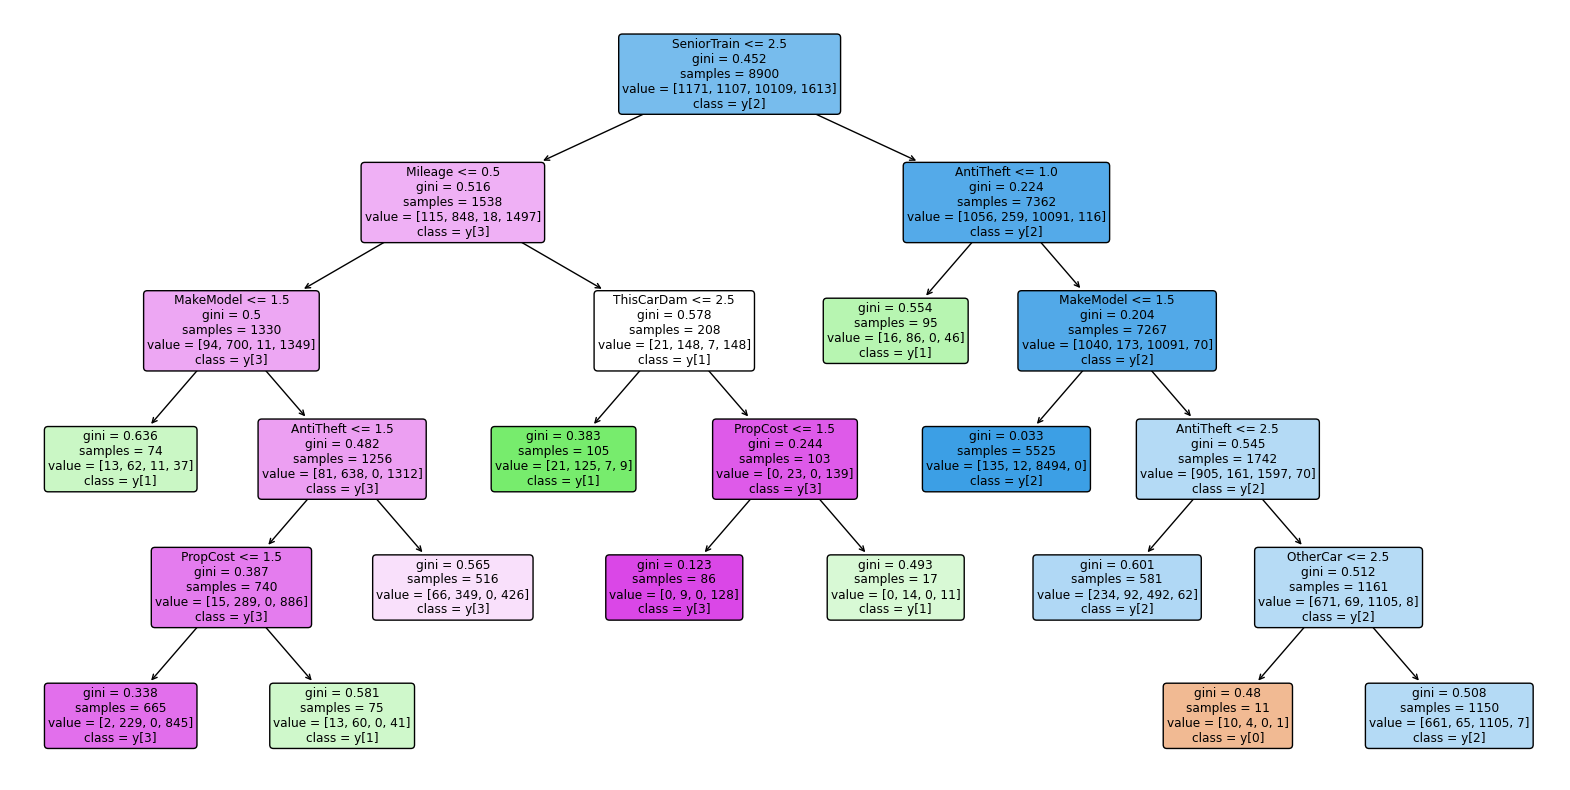

In [ ]:
# impressao
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize = (20, 10))
plot_tree(tree_to_visualize, filled = True, feature_names = base.columns[:-1], class_names = True, rounded = True)
plt.show()

In [ ]:
previsoes = modelo.predict(X_teste)

In [ ]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average = 'weighted')
recall = recall_score(y_teste, previsoes, average = 'weighted')
f1 = f1_score(y_teste, previsoes, average = 'weighted')
print(f'Acuracia: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')

Acuracia: 0.9288333333333333, Precision: 0.9249231961050131, Recall: 0.9288333333333333, F1: 0.9244475196632328


In [ ]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.73      0.75      0.74       542
    Moderate       0.69      0.70      0.70       505
        None       0.98      0.98      0.98      4228
      Severe       0.88      0.84      0.86       725

    accuracy                           0.92      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.92      0.92      0.92      6000

